In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit # we're importing just this one function from scipy.optimize
from scipy.interpolate import UnivariateSpline

2939240.0
122.0703125
[ 122.0703125   122.55859375  123.046875   ...,  982.91015625  983.3984375
  983.88671875]
[  2.93924000e+06   2.19087200e+06   1.05210500e+06 ...,   1.51900000e+03
   1.48100000e+03   1.45300000e+03]


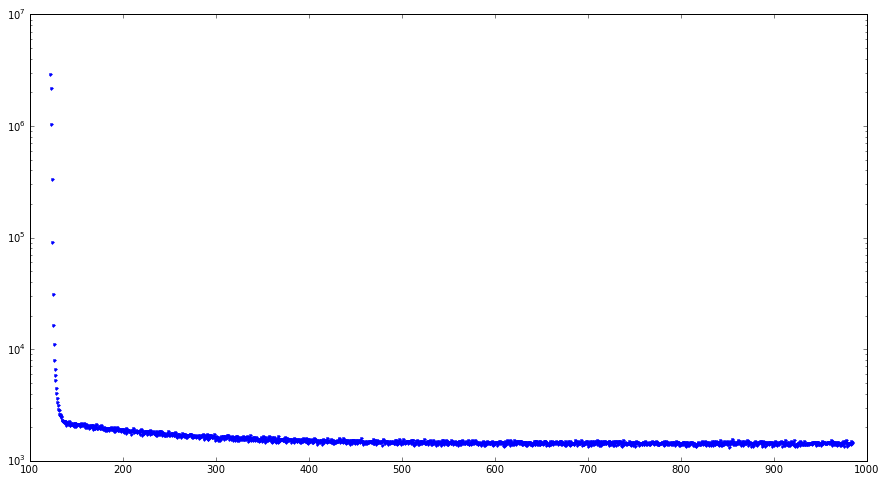

In [26]:
plt.figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')

ydata = np.loadtxt('N:/Lab 3/Positronium/161021_lifetime_14psi_delay_115(2.5)ns.csv', comments = '#', unpack = True)
xdata = 1000*np.arange(0,2048) / 2048.0

index = [item for item in range(len(ydata)) if ydata[item] == 0]
ydata = [i for j, i in enumerate(ydata) if j not in index]
xdata = [i for j, i in enumerate(xdata) if j not in index]

print(np.max(ydata))

x_index = np.arange(len(xdata))


for i in x_index:
    if ydata[i] == np.max(ydata):
        start = i
        x0 = xdata[start]
print(x0)

xdata_cut = xdata[start:]
ydata_cut = ydata[start:]


plt.semilogy(xdata_cut,ydata_cut,'b.')

type(ydata)


xdata_cut = np.array(xdata_cut)
print(xdata_cut)

ydata_cut = np.array(ydata_cut)
print(ydata_cut)

In [39]:
h1 = np.max(ydata)/3.0
h2 = np.max(ydata)/3.0
h3 = np.max(ydata)/3.0
b = 0.001

y0 = np.mean(ydata[1000:-1])
alpha = 1/(13.0)
beta = 1/(142.0)

#spline = UnivariateSpline(xdata, ydata-np.max(ydata)/2, s=0)
#r1, r2 = spline.roots() # find the roots
#print(r1,r2)

#b = r2 - r1

#std=[]

#for i in xdata:
#    std.append(np.sqrt(np.mean(abs(ydata -x0))**2))
               
#std_total = sum(std)/2048.0

#print(std_total)

guess = [x0,y0,alpha,beta, b, h1, h2, h3]
print guess        

[122.0703125, 1450.8100890207716, 0.07692307692307693, 0.007042253521126761, 0.001, 979746.66666666663, 979746.66666666663, 979746.66666666663]


In [40]:
#defining a Positronium function
def Positronium(x,x0,y0,alpha,beta,b,h1,h2, h3):
    '''Returns a 1D array of counts for an input array of bins x.
    Functions:
    
    - gaussian 
      input parameters: 
      - mean value of distribution: x0
      - standard deviation of distribution: sigma
      - peak height: h
      
    - p_decay
      input parameters:
      - free positrons decay constant: alpha
      
    - oPs_decay
      input parameters:
      - ortho-positronium decay constant: beta
      
    Other parameters:
    - background: y0
    '''
    
    
    lorentzian = (h1 / (1+(((x-x0)/b)**2.0)))
    p_decay = h2 * np.exp(-alpha*(x-x0))
    oPs_decay = h3 * np.exp(-beta*(x-x0))
    
    f = p_decay + oPs_decay + lorentzian + y0
    return f

# h is not the true height of any of the distributions- an individual height for each dist. is 
# required

[  1.21929240e+02   1.26696225e+03   7.03457876e-01   1.36593766e-01
   1.00728277e+00   7.95639741e+06  -5.05214571e+06  -2.98429725e+05]


(1000, 50000)

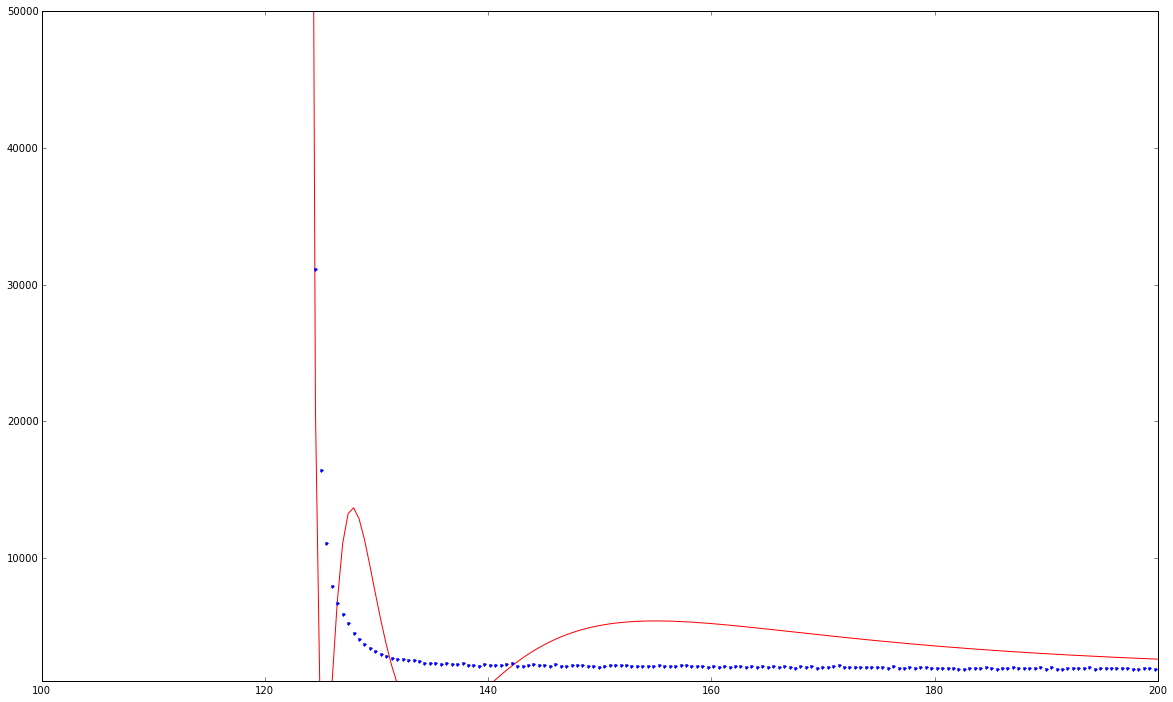

In [41]:
popt, pcov = curve_fit(Positronium, xdata_cut, ydata_cut, p0 = guess)
print popt
#ref: http://journals.aps.org/pr/pdf/10.1103/PhysRev.140.A8
# using 4.5 -+ 1.5 per microsecond per atm
y = Positronium(xdata_cut,popt[0],popt[1],popt[2],popt[3],popt[4],popt[5], popt[6],popt[7])


plt.figure(num=None, figsize=(20, 12), dpi=80, facecolor='w', edgecolor='k')
    
plt.plot(xdata_cut, y, 'r-')
plt.plot(xdata_cut, ydata_cut, 'b.')
plt.xlim(100, 200)
plt.ylim(1000, 50000)

#should get:
# 0.0073 decay constant (136ns lifetime) from oPS; got 0.0107 (93ns lifetime)
# 0.0045 decay constant (222ns lifetime) from p; got 0.9317 (1ns)